In [1]:
# Import libraries
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_score
from tqdm.notebook import tqdm

In [2]:
# Load data
data = np.loadtxt('features.txt')
data.shape

(998, 7)

  0%|          | 0/8 [00:00<?, ?it/s]

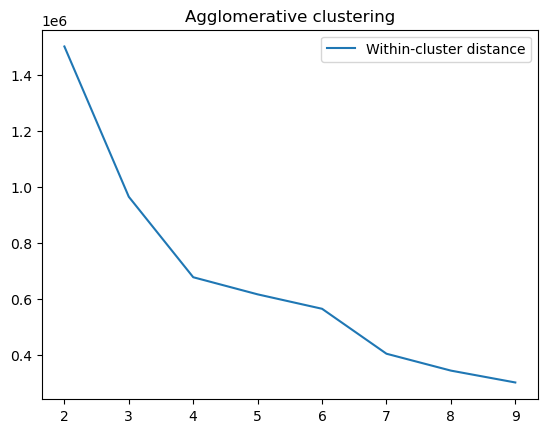

In [3]:
# Perform clustering with different number of clusters
# and plot the error

ns: list[int] = []
within_distances: list[float] = []
for n in tqdm(range(2, 10)):
    model = AgglomerativeClustering(n_clusters=n)
    label = model.fit_predict(data)
    ns.append(n)
    # centroids = [data[label == j].mean(axis=0) for j in range(n)]
    # within_distances.append(np.sum([pairwise_distances(data[label == j], centroids[j].reshape(1, -1)).sum()
    #                                 for j in range(n)]))
    within_distances.append(np.sum([pairwise_distances(data[label == j]).sum()
                                    for j in range(n)]))

ax = plt.subplot()
ax.plot(ns, within_distances, label='Within-cluster distance')
ax.legend()
ax.set_title('Agglomerative clustering')

plt.show()

In [4]:
# Choose the number of clusters according to the elbow method
n_clusters = 4
model = AgglomerativeClustering(n_clusters)
labels = model.fit_predict(data)

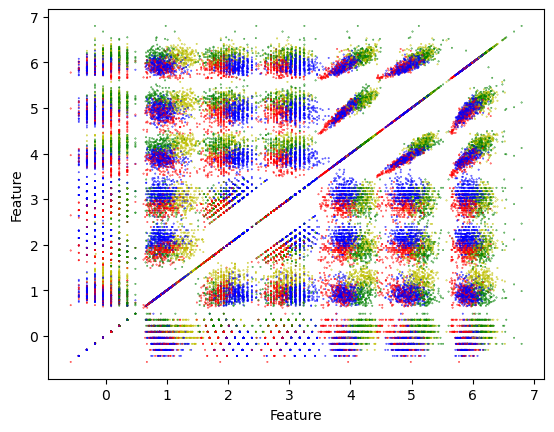

In [5]:
# Visuaize the result

cmap = mcolors.ListedColormap(['r', 'g', 'b', 'y'])

for i, j in np.ndindex((data.shape[1], data.shape[1])):
    plt.scatter(data[:, i]/5+i, data[:, j]/5+j,
                s=0.1, c=labels, cmap=cmap)

plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

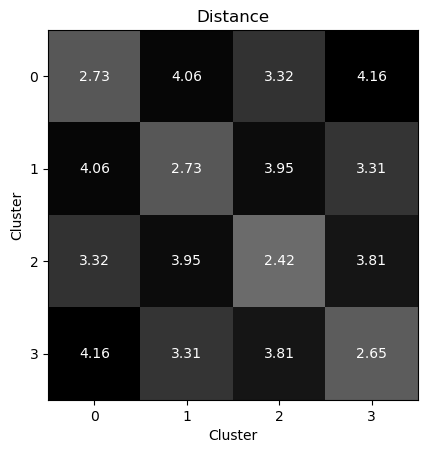

In [6]:
# Calculate the average distance between clusters
distance_matrix = np.zeros((n_clusters, n_clusters))
for i in range(n_clusters):
    for j in range(n_clusters):
        distance_matrix[i, j] = pairwise_distances(
            data[labels == i], data[labels == j]).mean()

ax = plt.subplot()
ax.imshow(distance_matrix, vmin=0, cmap='binary')

for i, j in np.ndindex((n_clusters, n_clusters)):
    ax.text(i, j, f'{distance_matrix[i, j]:.2f}',
            ha='center', va='center', color='w')

ax.set_xticks(np.arange(n_clusters))
ax.set_yticks(np.arange(n_clusters))
ax.set_xlabel('Cluster')
ax.set_ylabel('Cluster')
ax.set_title('Distance')

plt.show()

In [7]:
# Calculate the DBI and Silhouette Score

print(f'Davies-Bouldin Index: {davies_bouldin_score(data, labels):.2f}')
print(f'Silhouette Score: {silhouette_score(data, labels):.2f}')

Davies-Bouldin Index: 1.83
Silhouette Score: 0.17
